<a href="https://colab.research.google.com/github/naavaquinn/Fake-News-Detection/blob/main/LLMSONTOLOGY4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rdflib networkx matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.5 MB/s eta 0:00:00


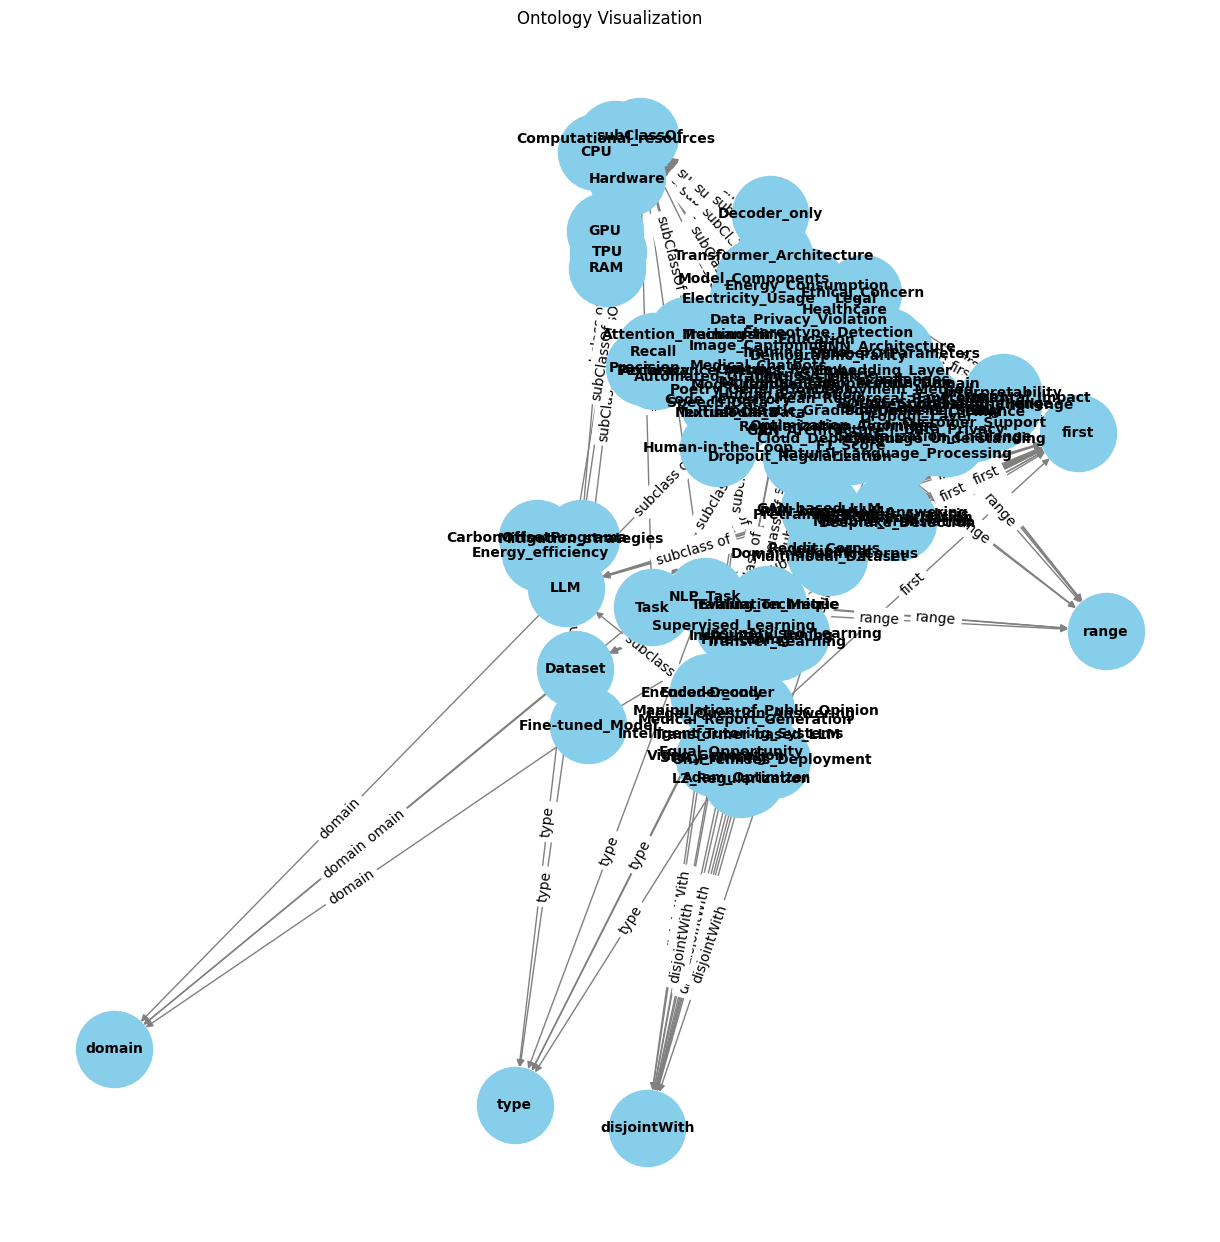

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, RDF, RDFS, OWL

# Load the RDF file (assuming TTL format)
file_path = '/content/ontology.ttl'
g = Graph()
g.parse(file_path, format="ttl")

# Create a function to extract class names and relationships
def display_ontology(g):
    ontology_info = {}

    # Extract classes and subclass relations
    for s, p, o in g.triples((None, RDF.type, OWL.Class)):
        class_name = s.split("#")[-1] if "#" in s else s.split("/")[-1]  # Extract the class name without URI
        ontology_info[class_name] = []

        # Find subclass relationships
        for subclass, _, superclass in g.triples((s, RDFS.subClassOf, None)):
            superclass_name = superclass.split("#")[-1] if "#" in superclass else superclass.split("/")[-1]
            ontology_info[class_name].append(f"subclass of {superclass_name}")

        # Find properties related to the class
        for subject, predicate, obj in g.triples((None, None, s)):
            predicate_name = predicate.split("#")[-1] if "#" in predicate else predicate.split("/")[-1]
            ontology_info[class_name].append(f"related by {predicate_name}")

    return ontology_info

# Extract the ontology information
ontology_info = display_ontology(g)

# Create a directed graph to represent the ontology
ontology_graph = nx.DiGraph()

# Add nodes (classes) and edges (relationships) to the graph
for class_name, relationships in ontology_info.items():
    ontology_graph.add_node(class_name)  # Add each class as a node
    for relationship in relationships:
        if "subclass of" in relationship:
            parent_class = relationship.split("subclass of ")[-1]
            ontology_graph.add_edge(class_name, parent_class, label="subclass of")
        elif "related by" in relationship:
            relation = relationship.split("related by ")[-1]
            ontology_graph.add_edge(class_name, relation, label=relation)

# Draw the graph using matplotlib
plt.figure(figsize=(12, 12))

# Use spring layout for better visualization
pos = nx.spring_layout(ontology_graph)

# Draw the nodes and edges
nx.draw(ontology_graph, pos, with_labels=True, node_color="skyblue", font_size=10, font_weight="bold", node_size=3000, edge_color="gray")

# Draw edge labels
edge_labels = nx.get_edge_attributes(ontology_graph, 'label')
nx.draw_networkx_edge_labels(ontology_graph, pos, edge_labels=edge_labels)

# Show the plot
plt.title("Ontology Visualization")
plt.show()


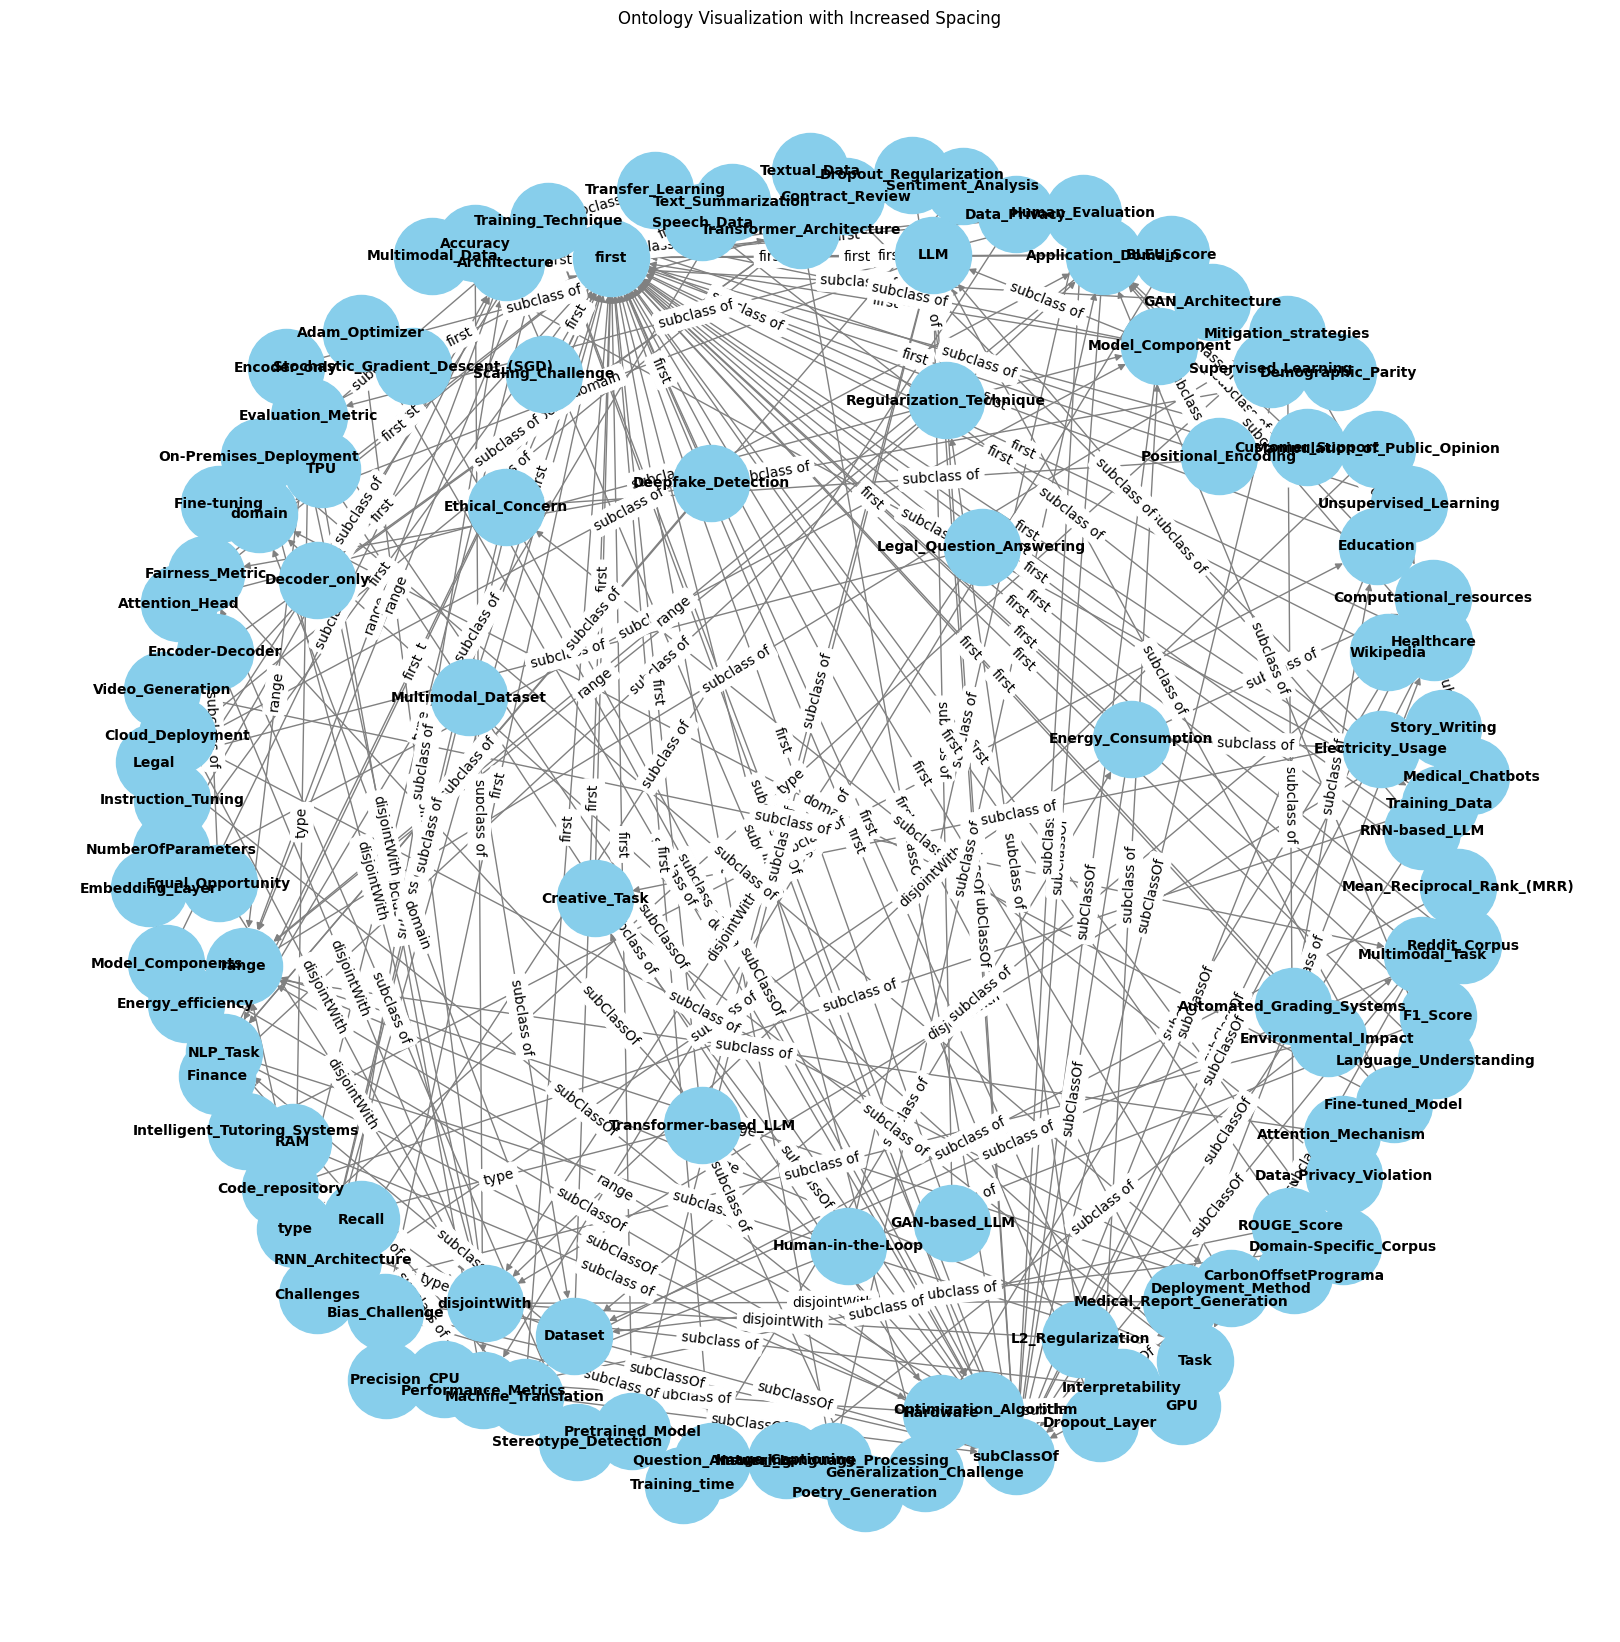

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, RDF, RDFS, OWL

# Load the RDF file (assuming TTL format)
file_path = '/content/ontology.ttl'
g = Graph()
g.parse(file_path, format="ttl")

# Create a function to extract class names and relationships
def display_ontology(g):
    ontology_info = {}

    # Extract classes and subclass relations
    for s, p, o in g.triples((None, RDF.type, OWL.Class)):
        class_name = s.split("#")[-1] if "#" in s else s.split("/")[-1]  # Extract the class name without URI
        ontology_info[class_name] = []

        # Find subclass relationships
        for subclass, _, superclass in g.triples((s, RDFS.subClassOf, None)):
            superclass_name = superclass.split("#")[-1] if "#" in superclass else superclass.split("/")[-1]
            ontology_info[class_name].append(f"subclass of {superclass_name}")

        # Find properties related to the class
        for subject, predicate, obj in g.triples((None, None, s)):
            predicate_name = predicate.split("#")[-1] if "#" in predicate else predicate.split("/")[-1]
            ontology_info[class_name].append(f"related by {predicate_name}")

    return ontology_info

# Extract the ontology information
ontology_info = display_ontology(g)

# Create a directed graph to represent the ontology
ontology_graph = nx.DiGraph()

# Add nodes (classes) and edges (relationships) to the graph
for class_name, relationships in ontology_info.items():
    ontology_graph.add_node(class_name)  # Add each class as a node
    for relationship in relationships:
        if "subclass of" in relationship:
            parent_class = relationship.split("subclass of ")[-1]
            ontology_graph.add_edge(class_name, parent_class, label="subclass of")
        elif "related by" in relationship:
            relation = relationship.split("related by ")[-1]
            ontology_graph.add_edge(class_name, relation, label=relation)

# Draw the graph using matplotlib
plt.figure(figsize=(16, 16))  # Increase figure size for better readability

# Use spring layout for better visualization, increase k to space out nodes
pos = nx.spring_layout(ontology_graph, k=1.5)

# Draw the nodes and edges
nx.draw(ontology_graph, pos, with_labels=True, node_color="skyblue", font_size=10, font_weight="bold", node_size=3000, edge_color="gray")

# Draw edge labels
edge_labels = nx.get_edge_attributes(ontology_graph, 'label')
nx.draw_networkx_edge_labels(ontology_graph, pos, edge_labels=edge_labels)

# Show the plot
plt.title("Ontology Visualization with Increased Spacing")
plt.show()


In [ ]:
from rdflib import Graph, OWL, RDF, RDFS

# Load the RDF file (assuming TTL format)
file_path = '/content/ontology.ttl'
g = Graph()
g.parse(file_path, format="ttl")

# Function to extract class information and generate Manchester Syntax
def generate_manchester_syntax(g):
    manchester_syntax = {}

    # Extract all classes
    for s, p, o in g.triples((None, RDF.type, OWL.Class)):
        class_name = s.split("#")[-1] if "#" in s else s.split("/")[-1]  # Extract the class name without URI
        manchester_syntax[class_name] = []

        # Subclass relationships
        for _, _, superclass in g.triples((s, RDFS.subClassOf, None)):
            superclass_name = superclass.split("#")[-1] if "#" in superclass else superclass.split("/")[-1]
            manchester_syntax[class_name].append(f"SubClassOf: {superclass_name}")

        # Equivalent class relationships
        for _, _, equivalent_class in g.triples((s, OWL.equivalentClass, None)):
            equivalent_class_name = equivalent_class.split("#")[-1] if "#" in equivalent_class else equivalent_class.split("/")[-1]
            manchester_syntax[class_name].append(f"EquivalentTo: {equivalent_class_name}")

        # Object properties
        for subject, predicate, obj in g.triples((s, None, None)):
            predicate_name = predicate.split("#")[-1] if "#" in predicate else predicate.split("/")[-1]
            obj_name = obj.split("#")[-1] if "#" in obj else obj.split("/")[-1]
            if predicate != RDF.type and predicate != RDFS.subClassOf and predicate != OWL.equivalentClass:
                manchester_syntax[class_name].append(f"Related by {predicate_name} to {obj_name}")

    return manchester_syntax

# Generate the Manchester Syntax for the ontology
manchester_syntax = generate_manchester_syntax(g)

# Print out the Manchester Syntax in a readable form
for class_name, descriptions in manchester_syntax.items():
    print(f"Class: {class_name}")
    for description in descriptions:
        print(f"  {description}")
    print("\n")


Class: Accuracy
  SubClassOf: Performance_Metrics


Class: Attention_Mechanism
  SubClassOf: Model_Components


Class: CPU
  SubClassOf: Hardware


Class: CarbonOffsetPrograma
  SubClassOf: Mitigation_strategies
  Related by comment to Initiatives to offset the carbon emissions from training LLMs


Class: Code_repository
  SubClassOf: Training_Data


Class: Computational_resources


Class: Decoder_only
  SubClassOf: Transformer_Architecture
  Related by disjointWith to Encoder-Decoder
  Related by disjointWith to Encoder_only


Class: Electricity_Usage
  SubClassOf: Energy_Consumption


Class: Embedding_Layer
  SubClassOf: Model_Components
  SubClassOf: Model_Component


Class: Encoder-Decoder
  SubClassOf: Transformer_Architecture
  Related by disjointWith to Encoder_only


Class: Encoder_only
  SubClassOf: Transformer_Architecture


Class: Energy_Consumption
  SubClassOf: Computational_resources
  SubClassOf: Challenges


Class: Energy_efficiency
  SubClassOf: Mitigation_strategies



owl:Thing not found explicitly in the ontology, but we will proceed with visualizing.


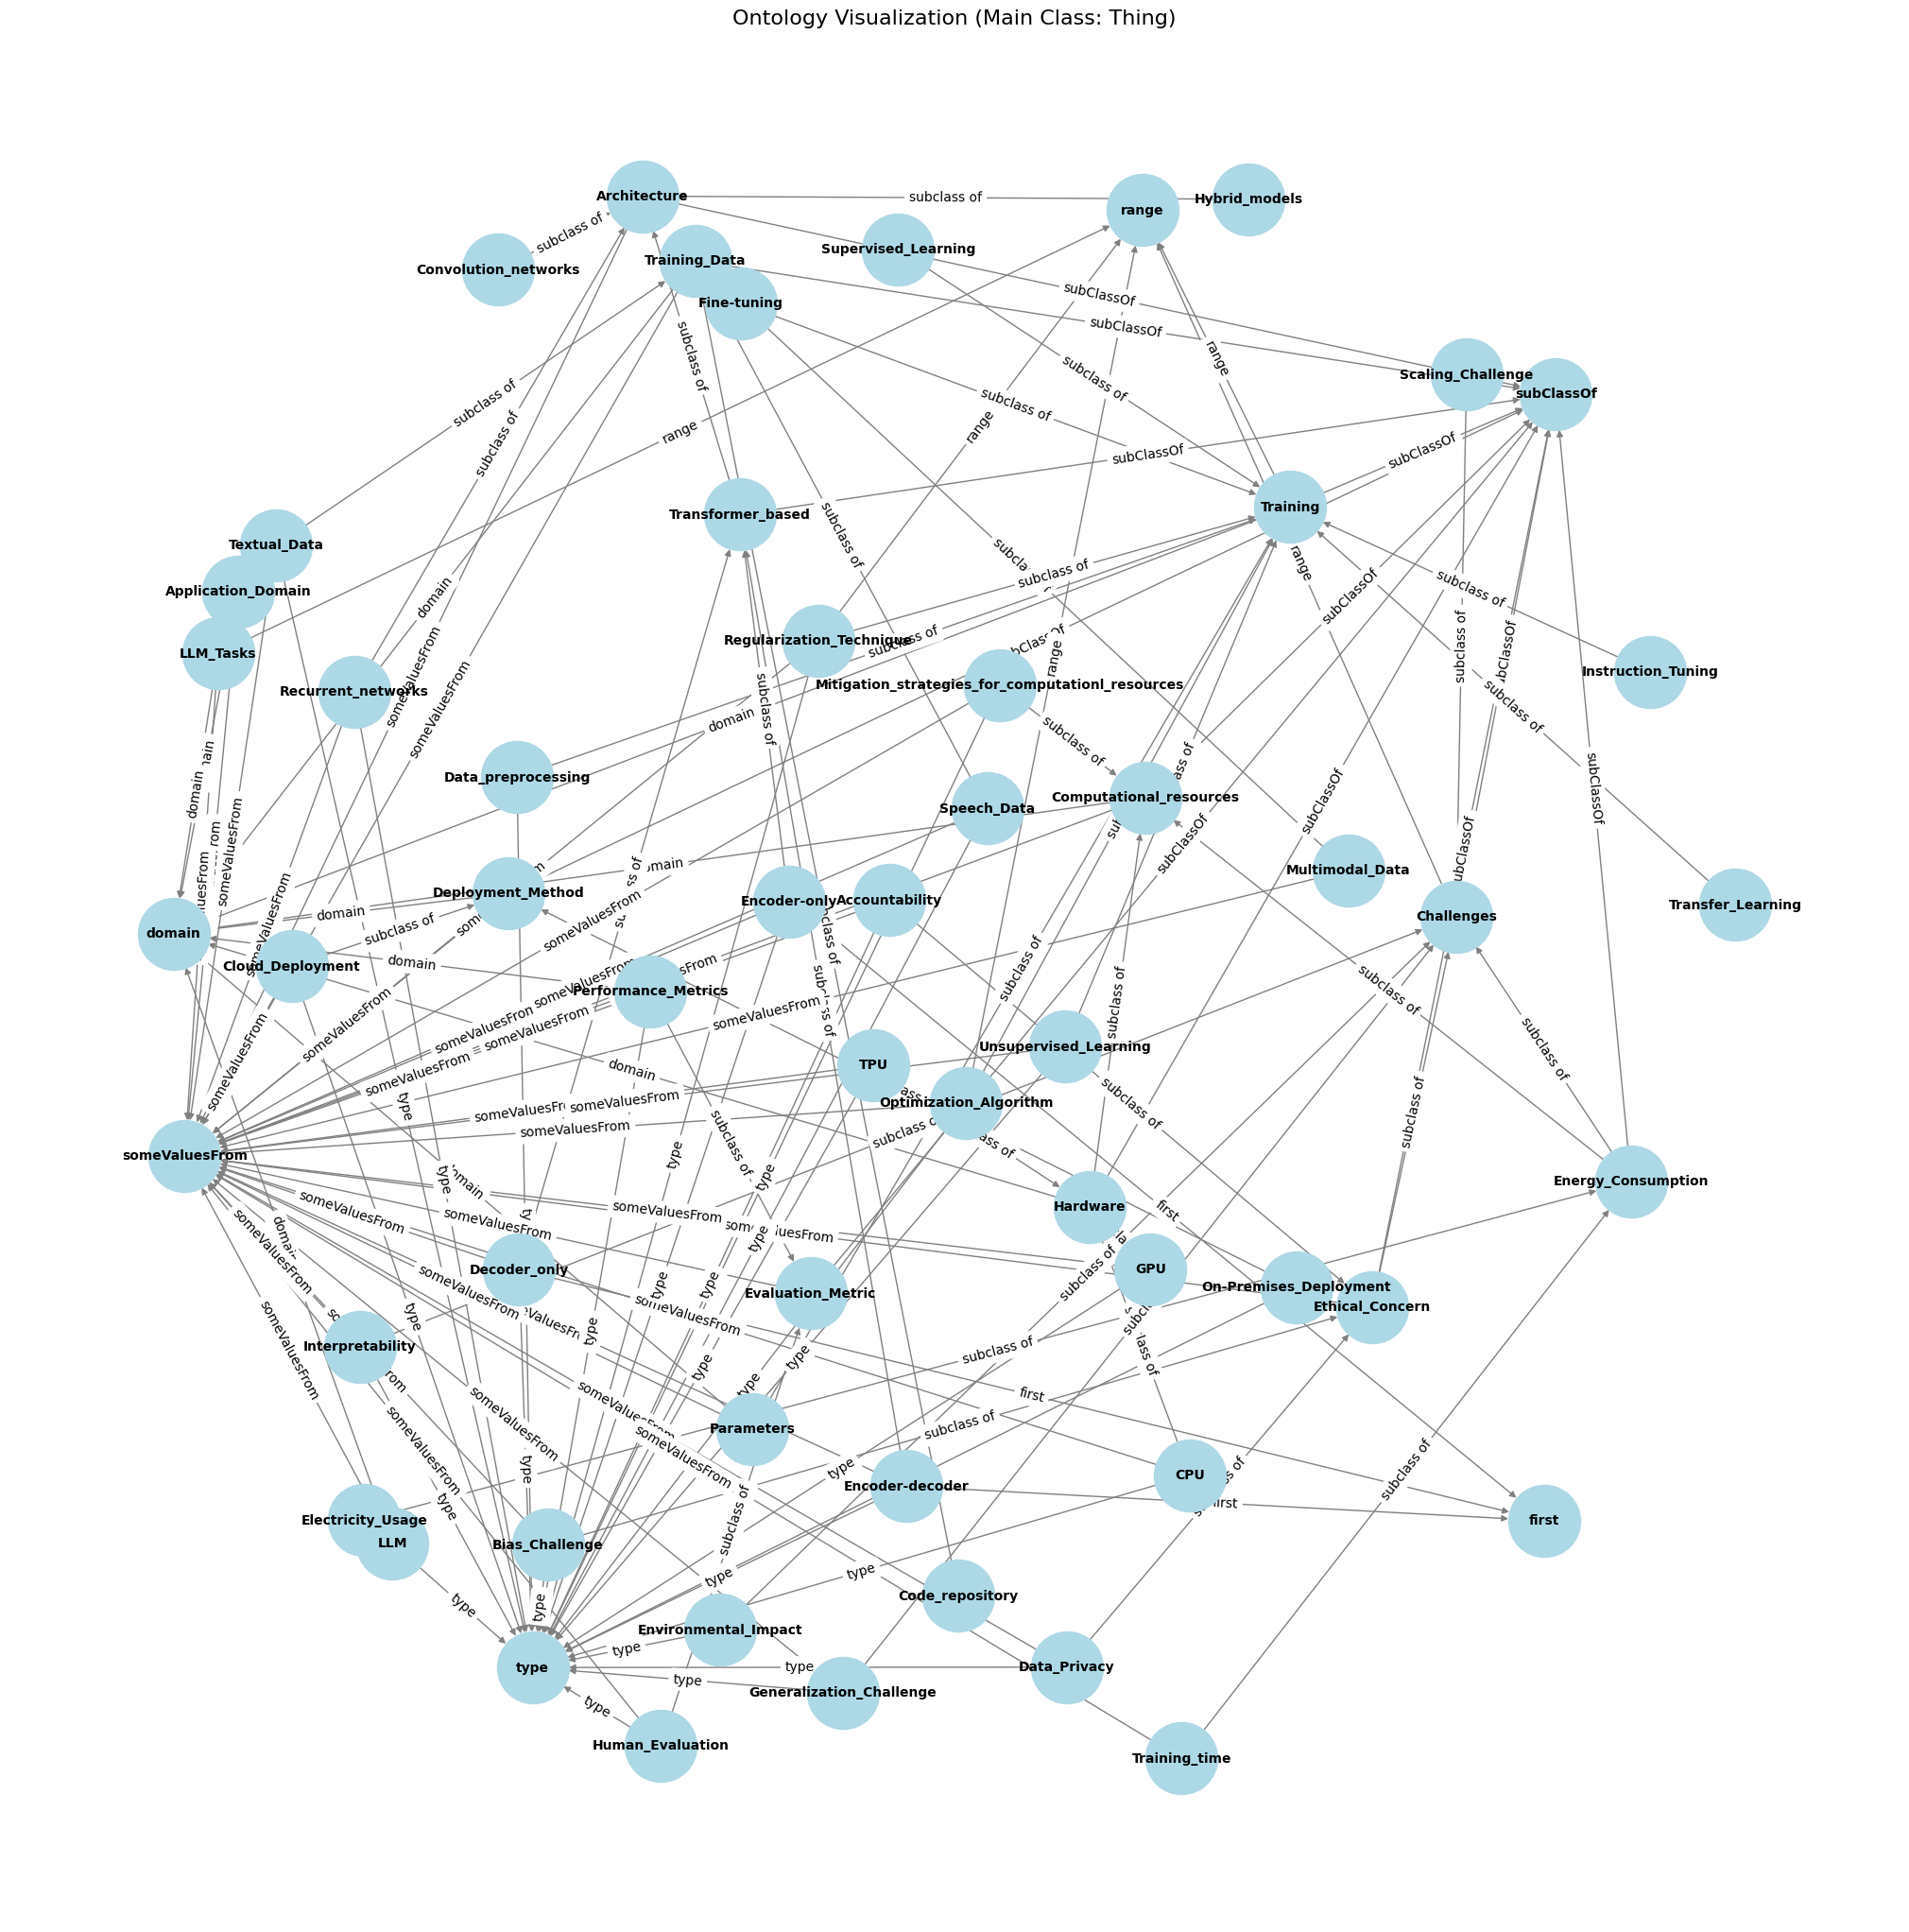

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, RDF, RDFS, OWL

# Load the RDF file (assuming TTL format)
file_path = '/content/final ontology_LLM (1) (3).ttl'
g = Graph()
g.parse(file_path, format="ttl")

# Function to extract class names and relationships
def display_ontology(g):
    ontology_info = {}

    # Extract classes and subclass relations
    for s, p, o in g.triples((None, RDF.type, OWL.Class)):
        class_name = s.split("#")[-1] if "#" in s else s.split("/")[-1]  # Extract the class name without URI
        ontology_info[class_name] = []

        # Find subclass relationships
        for subclass, _, superclass in g.triples((s, RDFS.subClassOf, None)):
            superclass_name = superclass.split("#")[-1] if "#" in superclass else superclass.split("/")[-1]
            ontology_info[class_name].append(f"subclass of {superclass_name}")

        # Find properties related to the class
        for subject, predicate, obj in g.triples((None, None, s)):
            predicate_name = predicate.split("#")[-1] if "#" in predicate else predicate.split("/")[-1]
            ontology_info[class_name].append(f"related by {predicate_name}")

    return ontology_info

# Extract the ontology information
ontology_info = display_ontology(g)

# Create a directed graph to represent the ontology
ontology_graph = nx.DiGraph()

# Add nodes (classes) and edges (relationships) to the graph
for class_name, relationships in ontology_info.items():
    ontology_graph.add_node(class_name)  # Add each class as a node
    for relationship in relationships:
        if "subclass of" in relationship:
            parent_class = relationship.split("subclass of ")[-1]
            ontology_graph.add_edge(class_name, parent_class, label="subclass of")
        elif "related by" in relationship:
            relation = relationship.split("related by ")[-1]
            ontology_graph.add_edge(class_name, relation, label=relation)

# Check if owl:Thing exists and centralize it
main_class = "Thing"  # Default to owl:Thing as the central class
if main_class not in ontology_graph:
    print("owl:Thing not found explicitly in the ontology, but we will proceed with visualizing.")

# Set up the plot
plt.figure(figsize=(20, 20))

# Apply spring layout, with increased k for spacing and more iterations for convergence
pos = nx.spring_layout(ontology_graph, k=2, iterations=100)

# Centralize owl:Thing by placing it at the center
if main_class in pos:
    pos[main_class] = [0, 0]  # Set the main class position at the center

# Draw the nodes, edges, and labels
nx.draw(ontology_graph, pos, with_labels=True, node_color="lightblue", node_size=3000, font_size=10, font_weight="bold", edge_color="gray")

# Draw edge labels
edge_labels = nx.get_edge_attributes(ontology_graph, 'label')
nx.draw_networkx_edge_labels(ontology_graph, pos, edge_labels=edge_labels)

# Show the plot
plt.title(f"Ontology Visualization (Main Class: {main_class})", fontsize=16)
plt.show()


In [ ]:
!pip install pyshacl
from pyshacl import validate
import rdflib

# Load your ontology
ontology_file_path = '/content/final ontology_LLM (1) (3).ttl'
g = rdflib.Graph()
g.parse(ontology_file_path, format='ttl')

# Define SHACL shapes (as provided earlier)
shapes_ttl = """
@prefix sh: <http://www.w3.org/ns/shacl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .

# Check for missing rdfs:label for all classes
ex:ClassLabelShape
    a sh:NodeShape ;
    sh:targetClass owl:Class ;
    sh:property [
        sh:path rdfs:label ;
        sh:minCount 1 ;
        sh:message "Class is missing rdfs:label" ;
    ] .

# Check if all classes have a defined rdf:type owl:Class
ex:ClassTypeShape
    a sh:NodeShape ;
    sh:targetClass owl:Class ;
    sh:property [
        sh:path rdf:type ;
        sh:hasValue owl:Class ;
        sh:message "Class is missing rdf:type owl:Class" ;
    ] .

# Check for missing rdfs:label for all properties (data properties and object properties)
ex:PropertyLabelShape
    a sh:NodeShape ;
    sh:targetObjectsOf rdf:type ;
    sh:or (
        [ sh:hasValue owl:DatatypeProperty ]
        [ sh:hasValue owl:ObjectProperty ]
    ) ;
    sh:property [
        sh:path rdfs:label ;
        sh:minCount 1 ;
        sh:message "Property is missing rdfs:label" ;
    ] .

# Check if all object properties have rdf:type owl:ObjectProperty
ex:ObjectPropertyTypeShape
    a sh:NodeShape ;
    sh:targetClass owl:ObjectProperty ;
    sh:property [
        sh:path rdf:type ;
        sh:hasValue owl:ObjectProperty ;
        sh:message "Object property is missing rdf:type owl:ObjectProperty" ;
    ] .

# Check if all datatype properties have rdf:type owl:DatatypeProperty
ex:DatatypePropertyTypeShape
    a sh:NodeShape ;
    sh:targetClass owl:DatatypeProperty ;
    sh:property [
        sh:path rdf:type ;
        sh:hasValue owl:DatatypeProperty ;
        sh:message "Datatype property is missing rdf:type owl:DatatypeProperty" ;
    ] .

# Check if annotation properties have labels
ex:AnnotationPropertyLabelShape
    a sh:NodeShape ;
    sh:targetClass owl:AnnotationProperty ;
    sh:property [
        sh:path rdfs:label ;
        sh:minCount 1 ;
        sh:message "Annotation property is missing rdfs:label" ;
    ] .
"""

# Load the SHACL shapes into a graph
shapes_graph = rdflib.Graph()
shapes_graph.parse(data=shapes_ttl, format='ttl')

# Perform SHACL validation
conforms, results_graph, results_text = validate(g, shacl_graph=shapes_graph)

# Output the results
if conforms:
    print("Ontology conforms to SHACL constraints.")
else:
    print("Ontology has SHACL violations:")
    print(results_text)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00


BadSyntax: at line 8 of <>:
Bad syntax (Prefix "ex:" not bound) at ^ in:
"...b'/07/owl#> .\n\n# Check for missing rdfs:label for all classes\n'^b'ex:ClassLabelShape\n    a sh:NodeShape ;\n    sh:targetClass o'..."

In [ ]:
!pip install pyshacl
from pyshacl import validate
import rdflib

# Load your ontology
ontology_file_path = '/content/final ontology_LLM (1) (3).ttl'
g = rdflib.Graph()
g.parse(ontology_file_path, format='ttl')

# Define SHACL shapes (as provided earlier)
shapes_ttl = """
@prefix sh: <http://www.w3.org/ns/shacl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix ex: <http://example.org/ontology#> . # Define the 'ex' prefix here

# Check for missing rdfs:label for all classes
ex:ClassLabelShape
    a sh:NodeShape ;
    sh:targetClass owl:Class ;
    sh:property [
        sh:path rdfs:label ;
        sh:minCount 1 ;
        sh:message "Class is missing rdfs:label" ;
    ] .

# ... (rest of your SHACL shapes) ...
"""

# Load the SHACL shapes into a graph
shapes_graph = rdflib.Graph()
shapes_graph.parse(data=shapes_ttl, format='ttl')

# Perform SHACL validation
conforms, results_graph, results_text = validate(g, shacl_graph=shapes_graph)

# Output the results
if conforms:
    print("Ontology conforms to SHACL constraints.")
else:
    print("Ontology has SHACL violations:")
    print(results_text)

Ontology conforms to SHACL constraints.


In [ ]:
!pip install rdflib # Install the rdflib package first
from rdflib import Graph, URIRef # Then import the necessary modules
from rdflib.namespace import RDFS
from graphviz import Digraph


# Load the ontology
ontology_file = "/content/ontology_LLM (3).ttl"  # Replace with your ontology file name
g = Graph()
g.parse(ontology_file, format="ttl")

# Create a Graphviz directed graph with styling
dot = Digraph(graph_attr={"rankdir": "LR"})

# Define key concepts and relationships (same as before)
key_concepts = [
    URIRef("http://www.semanticweb.org/awarkeh/ontologies/2024/8/untitled-ontology-3/LLM_Tasks"),
    URIRef("http://www.semanticweb.org/awarkeh/ontologies/2024/8/untitled-ontology-3/Architecture"),
    URIRef("http://www.semanticweb.org/awarkeh/ontologies/2024/8/untitled-ontology-3/Training"),
    URIRef("http://www.semanticweb.org/awarkeh/ontologies/2024/8/untitled-ontology-3/Training_Data"),
    URIRef("http://www.semanticweb.org/awarkeh/ontologies/2024/8/untitled-ontology-3/Evaluation_Metric"),
    URIRef("http://www.semanticweb.org/awarkeh/ontologies/2024/8/untitled-ontology-3/Challenges"),
]

relations = [
    ("http://www.semanticweb.org/awarkeh/ontologies/2024/8/untitled-ontology-3/LLM_Tasks", "http://www.semanticweb.org/awarkeh/ontologies/2024/8/untitled-ontology-3/Architecture", "hasArchitecture"),
    ("http://www.semanticweb.org/awarkeh/ontologies/2024/8/untitled-ontology-3/LLM_Tasks", "http://www.semanticweb.org/awarkeh/ontologies/2024/8/untitled-ontology-3/Training", "isTrainedWith"),
    ("http://www.semanticweb.org/awarkeh/ontologies/2024/8/untitled-ontology-3/Training", "http://www.semanticweb.org/awarkeh/ontologies/2024/8/untitled-ontology-3/Training_Data", "hasTrainingData"),
    ("http://www.semanticweb.org/awarkeh/ontologies/2024/8/untitled-ontology-3/LLM_Tasks", "http://www.semanticweb.org/awarkeh/ontologies/2024/8/untitled-ontology-3/Evaluation_Metric", "hasEvaluationMetric"),
    ("http://www.semanticweb.org/awarkeh/ontologies/2024/8/untitled-ontology-3/LLM_Tasks", "http://www.semanticweb.org/awarkeh/ontologies/2024/8/untitled-ontology-3/Challenges", "hasChallenge"),
]

# Add nodes for key concepts with styling
for concept in key_concepts:
    label = g.value(concept, RDFS.label)
    dot.node(concept.toPython(), label, shape="circle", style="filled", fillcolor="lightblue")

# Add edges for relationships with styling
for domain, range, label in relations:
    dot.edge(domain, range, label=label, color="black", arrowhead="normal")

# Render the graph
dot.render("ontology_structure", format="png", view=True)

'ontology_structure.png'